# FINAL PROJECT - MAT 201A ( WINTER 2016)
### AMBIKA YADAV

## IMAGE FILTER DESIGN FOR GLASS STAIN EFFECT

The project objective is to develop a image filter to produce a glass stain effect (which is a bit similar to a bokeh effect applied on images ). The following are the steps to achieve this objective :
1. Segment the image into sections of size blocksize and call each section a region
2. Generate a random x,y co-ordinate in every region , these are the vornoi points
3. Using one of the distance algorithms ( euclidean, chebychev or manhattan ), assign every pixel a region. These   regions are called vornoi regions.
4. Assign all the pixels in one region the same color . The color can be dervied by the mean , media or mode of the pixel color values in the region.

p_x,p_y - co-ordinates of every pixel

v_x,v_y - co-ordinates of region vornoi point

EUCLIDEAN DISTANCE : sqrt((p_x-v_x)^2+(p_y-v_y)^2)

CHEBYCHEV DISTANCE : max (|p_x-v_x|,|p_y-v_y|)

MANHATTAN DISTANCE : |p_x-v_x|+|p_y-v_y|  (looks like road structures in Manhattan )

[REFERENCE](http://softwarebydefault.com/2013/06/30/stained-glass-image-filter/)

In [1]:
%pylab inline
from __future__ import print_function
from __future__ import division
from scipy.io import wavfile
from PIL import Image
from scipy.spatial import Voronoi, voronoi_plot_2d

Populating the interactive namespace from numpy and matplotlib


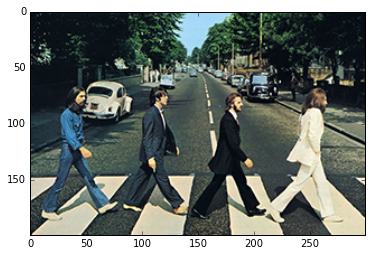

In [2]:
img1 = imread('img2.png')
imshow(img1)

In [3]:
# STEP 1.1 Resizing the image to be divided in the right portion
# STEP 1.2 Making an array of x and y co-ordinates in the image 
def segmentimage(img,blocksize):
    x_s = img.shape[0]
    y_s = img.shape[1]
    x_d = x_s%blocksize
    y_d = y_s%blocksize
    image = img1[0:x_s-x_d+1,0:y_s-y_d+1]
    x_array = []
    y_array = []
    x = image.shape[0]
    y = image.shape[1]
    n_x = int (x/blocksize)
    n_y = int (y/blocksize)
    for i in range(0,n_x+1):
        x_array.append(i*blocksize)
    for i in range(0,n_y+1):
        y_array.append(i*blocksize)
    return x_array,y_array


In [4]:
# STEP 2 : CHOOSING RANDOM XY CO ORDINATE IN EVERY SQUARE
def randomxyint(x,y):
    vornoimat=[]
    for i in range(0,len(x)-1):
        for j in range (0,len(y)-1):
            x_rand=random.randint(x[i],x[i+1])
            y_rand=random.randint(y[j],y[j+1])
            vornoimat.append([x_rand,y_rand])
    return vornoimat

In [5]:
# STEP 3 : ASSIGNING A REGION FOR EVERY XY CO ORDINATE ESTABLISHED IN LAST STEP
def imagesegment(vornoi,img):
    region = []
    for l in range(0,len(vornoi)):
        region.append(vornoi[l])
    return region

In [6]:
# STEP 4 : CALCULATING DISTANCE TO CLASSIFY PIXELS IN REGIONS
def distance(region,vornoi,img,dis_type):
    for i in range(1,img.shape[0]):
        for j in range(1,img.shape[1]):
            dis =[]
            for l in range (len(vornoi)):
                if (dis_type == "euclidean"):
                    distance = sqrt(((i-vornoi[l][0])*(i-vornoi[l][0])) + ((j-vornoi[l][1])*(j-vornoi[l][1])^2))
                    dis.append(distance)
                elif (dis_type == "chebychev"):
                    distance = max(abs(i-vornoi[l][0]),abs(j-vornoi[l][1]))
                    dis.append(distance)
                elif (dis_type == "manhattan"):
                    distance = abs(i-vornoi[l][0])+abs(j-vornoi[l][1])
                    dis.append(distance)
            region[dis.index(min(dis))].append([i,j])
    return region

In [7]:
# MEAN VALUE OF PIXELS IN A REGION 
def mean_pixel(img,vornoi,region):
    b=[] # brightness array of every pixel in every region
    averageRGB=[]
    for i in range(0,len(region)):
    #for i in range(0,5):
        b_1=[] # brightness of every pixel
        c_r=c_g=c_b=0
        for i_1 in range (0,len(region[i])):
        #for i_1 in range (0,5):
            try :
                x = ((img[vornoi[i][0],vornoi[i][1]][0])*0.3 +(img[vornoi[i][0],vornoi[i][1]][1])*0.59+(img[vornoi[i][0],vornoi[i][1]][2])*0.11)/255
                c_r = c_r + ((img[vornoi[i][0],vornoi[i][1]][0])/len(region[i]))
                c_g = c_g + ((img[vornoi[i][0],vornoi[i][1]][1])/len(region[i]))
                c_b = c_b + ((img[vornoi[i][0],vornoi[i][1]][2])/len(region[i]))
                b_1.append(x)
            except :
                pass
        b.append(b_1)
        averageRGB.append([c_r,c_g,c_b]) # give this value in every pixel of that region (MEAN)
    return b,averageRGB
    


In [8]:
#MEDIAN INDEXING
def final_median_pixel(img,b,region,vornoi):
    median_index = []
    for j in range(0,len(region)):
        for i in range(0,len(region[j])):
            if (b[j][i]== median(b[j])) :
                value = img[vornoi[j][0],vornoi[j][1]]
                median_index.append(value) 
                break
    #return median_index
    for i in range(0,len(region)):
        for i_1 in range (0,len(region[i])):
            try :
                img[region[i][i_1][0],region[i][i_1][1]] = median_index[i]
            except :
                 pass


In [9]:
#MODE INDEXING
from scipy.stats import mode
def final_mode_pixel(img,b,region,vornoi):
    mode_index = []
    for j in range(0,len(region)):
        for i in range(0,len(region[j])):
            if (b[j][i]== mode(b[j])[0]) :
                value = img[vornoi[j][0],vornoi[j][1]]
                mode_index.append(value) 
                break
    
    #return mode_pixel
    for i in range(0,len(region)):
        for i_1 in range (0,len(region[i])):
            try :
                img[region[i][i_1][0],region[i][i_1][1]] = mode_index[i]
            except :
                pass


In [10]:
# AVERAGE INDEXING
def final_img_mean(region,img,mean):
    for i in range(0,len(region)):
        for i_1 in range (0,len(region[i])):
            try :
                img[region[i][i_1][0],region[i][i_1][1]] = mean[i]
            except :
                pass
    imshow(img)

In [11]:
# NO MODE INDEXING : WHEN NO MODE IS SELECTED , GIVE IN PIXEL VALUE OF THE RANDOM PIXEL CHOSEN EARLIER
def final_img(region,vornoi,img):
    for i in range(0,len(region)):
        for i_1 in range (0,len(region[i])):
            try :
                x = img[vornoi[i][0],vornoi[i][1]]
                img[region[i][i_1][0],region[i][i_1][1]] = x
            except :
                pass
    imshow(img)

In [12]:
# PUTTING ALL STEPS TOGETHER
def stainglasseffect(img,blocksize,dis_type,mode):
    x,y = segmentimage(img,blocksize)
    vornoi = randomxyint(x,y)
    region = imagesegment(vornoi,img)
    dis_region = distance(region,vornoi,img,dis_type)
    b = mean_pixel(img,vornoi,region)[0]
    mean = mean_pixel(img,vornoi,region)[1]
    if (mode=="MEAN"):
        final_img_mean(region,img,mean)
    elif (mode=="MODE"):
        final_mode_pixel(img,b,region,vornoi)
    elif (mode == "MEDIAN"):
        final_median_pixel(img,b,region,vornoi)
    elif (mode == "NONE"):
        final_img(region,vornoi,img)
    return img
    

In [13]:
# GOING THROUGH ALL STEPS ONE AT A TIME 

In [14]:
#STEP 1 : SEGMENT IMAGE INTO BLOCKSIZE 40 AND STORING REGIONS CO ORDINATES IN ARRAY.
x,y = segmentimage(img1,40)

In [15]:
#STEP 2 : GENERATE RANDOM XY CO ORDINATES IN EVERY REGION
vornoi = randomxyint(x,y)

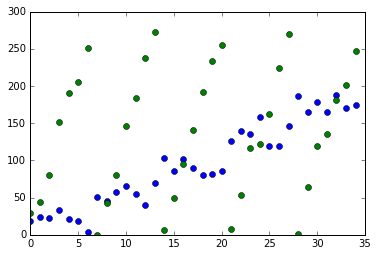

In [16]:
# PLOT TO SEE RANDOMESS OF THE VARIABLE
plot(vornoi,'o')

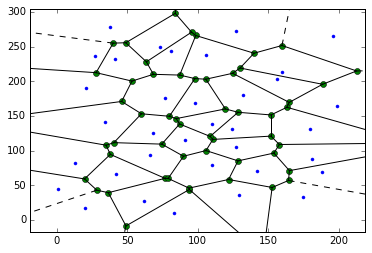

In [17]:
#DRAWING THE VORNOI FOR THIS SEGMENTATION
vor = Voronoi(randomxyint(segmentimage(img1,40)[0],segmentimage(img1,40)[1]))
voronoi_plot_2d(vor)
plt.show()

In [18]:
# ASSIGNING THE RANDOM XY COORDINATES TO THE REGIONS 
region = imagesegment(vornoi,img1)

In [19]:
# GROUPING ALL THE PIXELS IN THE IMAGE IN REGIONS DEPENDING ON THEIR DISTANCE FROM THE VORNOI POINTS
region = distance(region,vornoi,img1,dis_type = "chebychev")

In [20]:
# FINDING THE MEAN VALUE OF THE RGB COMPONENTS OF EVERY REGION
b = mean_pixel(img1,vornoi,region)[1]

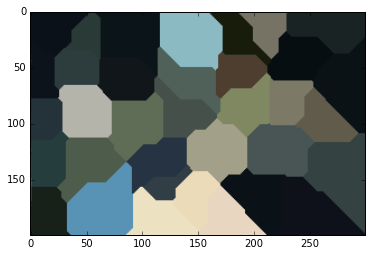

In [21]:
# FINAL OUTPUT
final_img_mean(region,img1,b)

#### RANDOM COLOR SELECTION + EUCLIDEAN DISTANCE ALGORITHM + BLOCKSIZE = 3

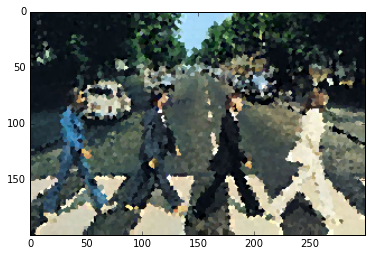

In [22]:
img1 = imread('img2.png')
img2 = stainglasseffect(img1,3,dis_type = "euclidean",mode="NONE")
imshow(img2)
gcf().set_figwidth(100)

#### RANDOM COLOR SELECTION + EUCLIDEAN DISTANCE ALGORITHM + BLOCKSIZE = 5

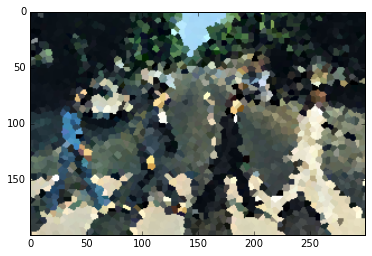

In [24]:
img1 = imread('img2.png')
img3 = stainglasseffect(img1,5,dis_type = "euclidean",mode="NONE")
imshow(img3)
gcf().set_figwidth(100)

#### RANDOM COLOR SELECTION + EUCLIDEAN DISTANCE ALGORITHM + BLOCKSIZE = 7

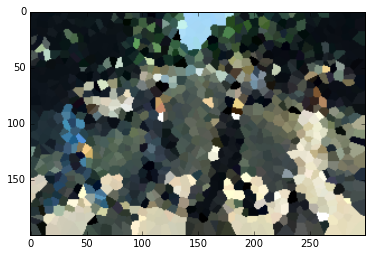

In [25]:
img1 = imread('img2.png')
img4 = stainglasseffect(img1,7,dis_type = "euclidean",mode="NONE")
imshow(img4)
gcf().set_figwidth(100)

#### MEAN COLOR SELECTION + EUCLIDEAN DISTANCE ALGORITHM + BLOCKSIZE = 5            

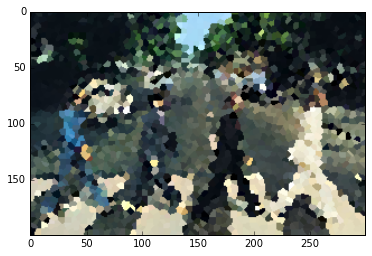

In [26]:
img1 = imread('img2.png')
img5 = stainglasseffect(img1,5,dis_type = "euclidean",mode="MEAN")
imshow(img5)
gcf().set_figwidth(100)

#### MEDIAN COLOR SELECTION + EUCLIDEAN DISTANCE ALGORITHM + BLOCKSIZE = 5      

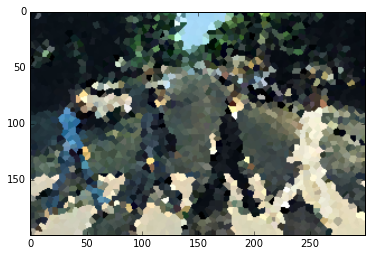

In [27]:
img1 = imread('img2.png')
img6 = stainglasseffect(img1,5,dis_type = "euclidean",mode="MEDIAN")
imshow(img6)
gcf().set_figwidth(100)

#### MODE COLOR SELECTION + EUCLIDEAN DISTANCE ALGORITHM + BLOCKSIZE = 5   

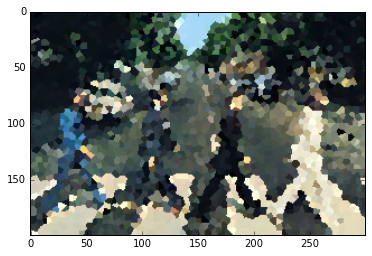

In [28]:
img1 = imread('img2.png')
img7 = stainglasseffect(img1,5,dis_type = "euclidean",mode="MODE")
imshow(img7)
gcf().set_figwidth(100)

#### MODE COLOR SELECTION + CHEBYCHEV DISTANCE ALGORITHM + BLOCKSIZE = 5   

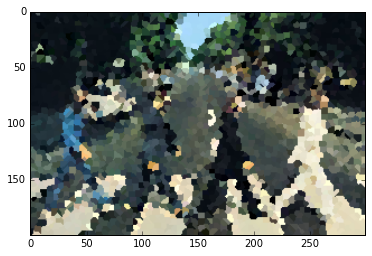

In [29]:
img1 = imread('img2.png')
img8 = stainglasseffect(img1,5,dis_type = "chebychev",mode="MODE")
imshow(img8)
gcf().set_figwidth(100)

#### MODE COLOR SELECTION + MANHATTAN DISTANCE ALGORITHM + BLOCKSIZE = 5   

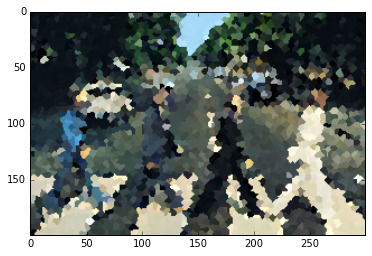

In [30]:
img1 = imread('img2.png')
img9 = stainglasseffect(img1,5,dis_type = "manhattan",mode="MODE")
imshow(img9)
gcf().set_figwidth(100)